In [125]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

In [126]:
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

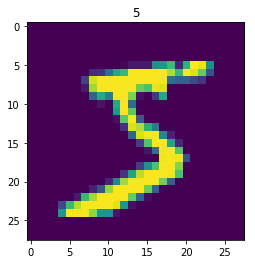

In [127]:
plt.imshow(train_images[0])
plt.title(str(train_labels[0]))
plt.show()

In [136]:
train_images = train_images.reshape(train_images.shape[0], -1) / 255
test_images = test_images.reshape(test_images.shape[0], -1) / 255

In [151]:
X = train_images
y = train_labels

In [152]:
# Defining the architecture of neural Network
n_x = train_images.shape[1]
n_h = 256
n_y = 10

In [153]:
# Initializing the pararmeters
W1 = 0.01 * np.random.randn(n_x, n_h)
b1 = np.ones((1, n_h)) * 0.01
W2 = 0.01 * np.random.randn(n_h, n_y)
b2 = np.ones((1, n_y)) * 0.01

In [154]:
# ReLU Activation function
def ReLU(x):
    return np.maximum(x, 0)

In [155]:
# Forward propagation
Z1 = X.dot(W1) + b1
A1 = ReLU(Z1)
Z2 = A1.dot(W2) + b2
yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)

In [156]:
m = X.shape[0]

In [157]:
# Cross Entropy Loss
loss = np.mean(-np.log(yhat[range(m), y]))

In [158]:
loss

2.3034590503142574

In [159]:
# Backpropagation
dZ2 = yhat
dZ2[range(m),y] -= 1
dZ2 = dZ2 / m
dW2 = A1.T.dot(dZ2)
db2 = np.sum(dZ2, axis=0, keepdims=True)
dZ1 = dZ2.dot(W2.T)
dZ1[dZ1 <= 0] = 0
dW1 = X.T.dot(dZ1)
db1 = np.sum(dZ1, axis=0, keepdims=True)

In [ ]:
# Update the paramteres
batch_size = 64
n_epochs = 400
learning_rate = 1e-2
train_loss = []
test_loss = []
test_acc = []
train_acc = []
keep_prob = 0.7
number_of_batches = m // batch_size
for epoch in range(n_epochs):
    loss = 0.0
    correct_cnt = 0
    for i in range(0, m - m % batch_size, batch_size):
        X = train_images[i: i + batch_size]
        y = train_labels[i: i + batch_size]
        # Forward propagation
        Z1 = X.dot(W1) + b1
        A1 = np.tanh(Z1)
        # DropOut
        dropout_mask = np.random.uniform(size=A1.shape)
        dropout_mask = dropout_mask < keep_prob
        A1 = A1 * dropout_mask
        A1 /= keep_prob
        Z2 = A1.dot(W2) + b2
        yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
        # Cross Entropy Loss
        loss += np.mean(-np.log(yhat[range(X.shape[0]), y]))
        correct_cnt += np.sum(np.argmax(yhat, axis=1) == y)
        # Backpropagation
        dZ2 = yhat
        dZ2[range(i % batch_size, (i % batch_size + batch_size)), y] -= 1
        dZ2 = dZ2 / batch_size
        dW2 = A1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = dZ2.dot(W2.T) * (1 - A1 ** 2)
        dZ1 = dZ1 * dropout_mask
        #dZ1[dZ1 <= 0] = 0
        dW1 = X.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        # Update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    loss = loss / number_of_batches
    train_acc.append(correct_cnt / m)
    train_loss.append(loss)
    X = test_images
    Z1 = X.dot(W1) + b1
    A1 = np.tanh(Z1)
    Z2 = A1.dot(W2) + b2
    yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
    # Cross Entropy Loss
    loss = np.mean(-np.log(yhat[range(X.shape[0]), test_labels]))
    test_loss.append(loss)
    test_correct_cnt = np.sum(np.argmax(yhat, axis=1) == test_labels)
    test_acc.append(test_correct_cnt / len(test_labels))
    print(f'loss after {epoch} epoch: {loss}')

loss after 0 epoch: 0.1887693189820623
loss after 1 epoch: 0.1856437588143313
loss after 2 epoch: 0.18250084980982942
loss after 3 epoch: 0.17910999808684672
loss after 4 epoch: 0.17631339488806966
loss after 5 epoch: 0.17360509224814435
loss after 6 epoch: 0.17114551391130298
loss after 7 epoch: 0.16806526390281395
loss after 8 epoch: 0.16570056515776374
loss after 9 epoch: 0.16344769185306168
loss after 10 epoch: 0.16089488969691737
loss after 11 epoch: 0.15887450009603754
loss after 12 epoch: 0.1564820089552316
loss after 13 epoch: 0.15464686936663496
loss after 14 epoch: 0.15304217911833026
loss after 15 epoch: 0.15102925293551644
loss after 16 epoch: 0.14947899613213586
loss after 17 epoch: 0.14759920792163683
loss after 18 epoch: 0.14580794934559194
loss after 19 epoch: 0.14388545656019316
loss after 20 epoch: 0.14266830377650014
loss after 21 epoch: 0.140723086566026
loss after 22 epoch: 0.1393402271874266
loss after 23 epoch: 0.13807727430986588
loss after 24 epoch: 0.136462196

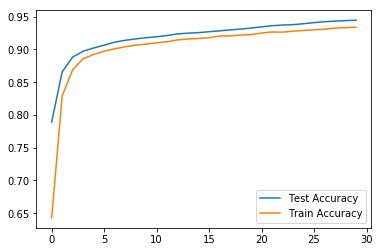

In [165]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_acc, label='Test Accuracy')
ax.plot(train_acc, label='Train Accuracy')
plt.legend()
plt.show()

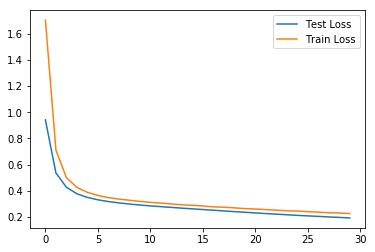

In [166]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_loss, label='Test Loss')
ax.plot(train_loss, label='Train Loss')
plt.legend()
plt.show()

In [149]:
test_acc[-1]

0.9819

In [150]:
train_acc[-1]

0.9989833333333333